In [46]:
from shodan import Shodan
import pandas as pd
import matplotlib.pyplot as plt

# Define number of countries to process from input file
N_COUNTRIES = 3

# Read API key from file and initialiye shodan API
with open('input/api.key', 'r') as file:
    key = file.read().rstrip()
api = Shodan(key)


In [47]:

# function to get the total number of industrial control systems services on the Internet per Country
def get_ics_counts(country_code):
    return api.count(f'tag:ics country:{country_code}')['total']


# Initialize Data Frame with population data and country codes from file
countries = pd.read_csv('input/countries.csv', nrows=N_COUNTRIES, header=0)
print(countries)


  code  population
0   AF    29121286
1   AL     2986952
2   DZ    34586184


In [48]:

# Download ics data from shodan for each country
ics_counts = [get_ics_counts(code) for code in countries['code']]

# Update Data Frame with ics data
countries['ics_counts'] = ics_counts
print(countries)


  code  population  ics_counts
0   AF    29121286           0
1   AL     2986952           8
2   DZ    34586184           5


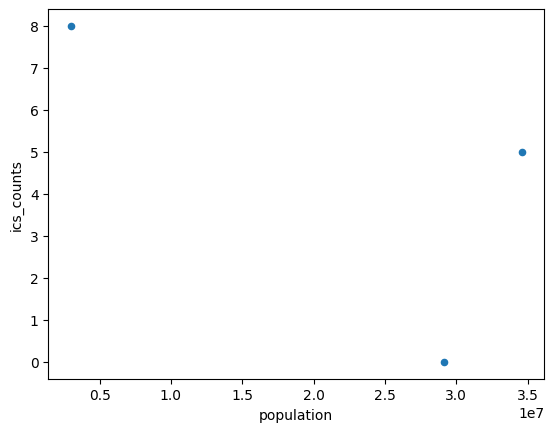

In [50]:
# Plot Population vs number of ics in a country
figure = countries.plot.scatter(x='population',y='ics_counts')
# figure.axes.set_xscale('log')
plt.savefig(f'output/scatterplot_of_{N_COUNTRIES}_countries.png')

In [51]:
# Explore data with selectors
print(countries[countries['population'] > 500000000])
print(countries[countries['ics_counts'] > 4000])


Empty DataFrame
Columns: [code, population, ics_counts]
Index: []
Empty DataFrame
Columns: [code, population, ics_counts]
Index: []
